Number of missing titles: 558
Total number of titles: 72134
Percentage of missing titles: 0.77%
count    71576.000000
mean        16.680941
std          6.549482
min          1.000000
25%         12.000000
50%         16.000000
75%         20.000000
max        107.000000
dtype: float64


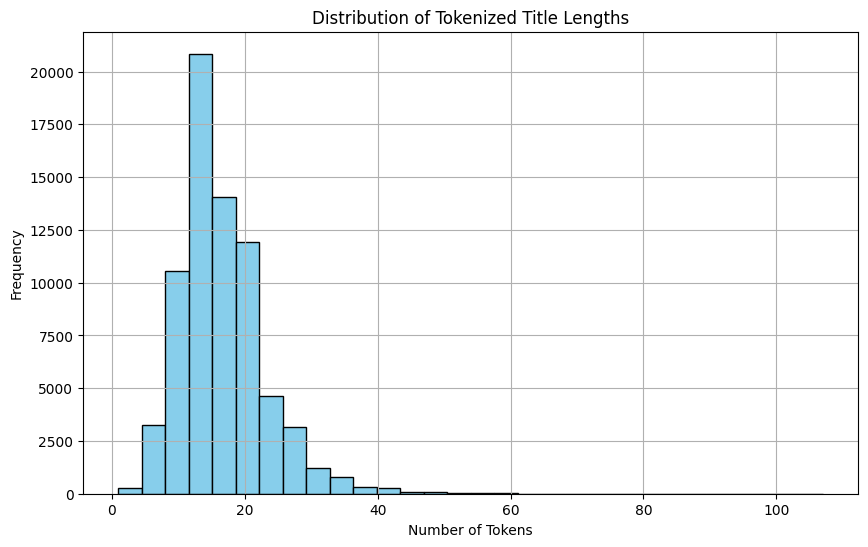

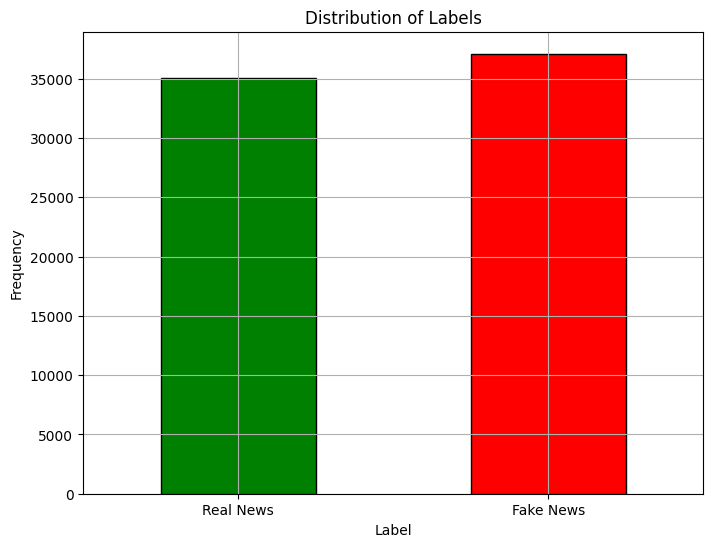

Label Distribution:
label
Real News    35028
Fake News    37106
Name: count, dtype: int64


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizerFast

from fakenews.config import RAW_DATA_DIR

# Load your dataset
data = pd.read_csv(os.path.join(RAW_DATA_DIR, "WELFake_Dataset.csv"))

# Analyze missing values in the 'title' column
missing_titles = data["title"].isna().sum()
total_titles = data["title"].shape[0]
print(f"Number of missing titles: {missing_titles}")
print(f"Total number of titles: {total_titles}")
print(f"Percentage of missing titles: {missing_titles / total_titles * 100:.2f}%")

# Tokenize titles and get their lengths, considering only non-missing titles
titles = data["title"].dropna().tolist()

# Initialize the tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenize the titles and get their lengths
tokenized_lengths = [len(tokenizer.tokenize(title)) for title in titles]

# Create a Pandas Series from the lengths for analysis
lengths_series = pd.Series(tokenized_lengths)

# Print basic statistics about the lengths
print(lengths_series.describe())

# Plot the histogram for title lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths_series, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Tokenized Title Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Create a bar plot for label distribution
label_counts = data["label"].value_counts().sort_index()
label_names = {0: "Real News", 1: "Fake News"}

# Map the labels to their names
label_counts.index = label_counts.index.map(label_names)

# Plot the label distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["green", "red"], edgecolor="black")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Print the counts of each label
print("Label Distribution:")
print(label_counts)